# 作業

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變 color space 來調整飽和度
2. 實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = 'data/lena.png'

# 以彩色圖片的方式載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

## 改變飽和度

- 轉換成 HSV color space, 改變 s channel 的值

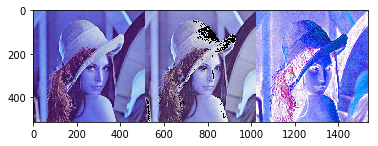

In [30]:
# 為了要改變飽和度，我們先把 color space 轉成 HSV 格式
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
change_percentage = 0.2

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HSV color space 減少飽和度
img_hsv_down = img_hsv.astype('float32')
img_hsv_down[:,:,1] = img_hsv_down[:,:,1]/255 - change_percentage
img_hsv_down[img_hsv_down[:,:,1] < 0] = 0
img_hsv_down[:,:,1] = img_hsv_down[:,:,1]*255
img_hsv_down = img_hsv_down.astype('uint8')

# 在 HSV color space 增加飽和度
img_hsv_up = img_hsv.astype('float32')
img_hsv_up[:,:,1] = img_hsv_up[:,:,1]/255 + change_percentage
img_hsv_up[img_hsv_up[:,:,1] > 1] = 1
img_hsv_up[:,:,1] = img_hsv_up[:,:,1]*255
img_hsv_up = img_hsv_up.astype('uint8')

# 轉換 color space 回 BGR
img_hsv_down = cv2.cvtColor(img_hsv_down, cv2.COLOR_HSV2BGR)
img_hsv_up = cv2.cvtColor(img_hsv_up, cv2.COLOR_HLS2BGR)

# 組合圖片 + 顯示圖片

img_hsv_concat = np.hstack((img, img_hsv_down, img_hsv_up))
plt.imshow(img_hsv_concat)
plt.show()

# while True:
#     cv2.imshow('change saturation', img_hsv_change)
    
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break

## 直方圖均衡

1. case 1: 把彩圖拆開對每個 channel 個別做直方圖均衡再組合起來
2. case 2: 轉換 color space 到 HSV 之後對其中一個 channel 做直方圖均衡

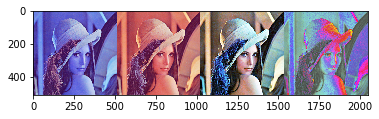

In [93]:
# case 1
# 每個 channel 個別做直方圖均衡
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_RGB_R = cv2.equalizeHist(cv2.split(img_RGB)[0])
img_RGB_G = cv2.equalizeHist(cv2.split(img_RGB)[1])
img_RGB_B = cv2.equalizeHist(cv2.split(img_RGB)[2])

# 組合經過直方圖均衡的每個 channel
img_bgr_equal = cv2.merge([img_RGB_R, img_RGB_G, img_RGB_B])

# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
img_hsv_equal = cv2.equalizeHist(img_hsv[:,:,0])
img_hsv_equal = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)

# 組合圖片 + 顯示圖片
img_bgr_equalHist = np.hstack((img, img_RGB, img_bgr_equal, img_hsv_equal))
plt.imshow(img_bgr_equalHist)

# while True:
#     # 比較 (原圖, BGR color space 對每個 channel 做直方圖均衡, HSV color space 對明度做直方圖均衡)
#     cv2.imshow('bgr equal histogram', img_bgr_equalHist)
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break

## 調整對比 / 明亮

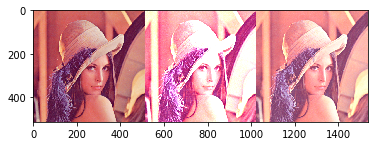

In [92]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img_RGB, alpha=2.0, beta=0)
add_lighness = cv2.convertScaleAbs(img_RGB, alpha=1.0, beta=50)

# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img_RGB, add_contrast, add_lighness))
plt.imshow(img_contrast_light)

# while True:
#     # 比較不同程度的對比 / 明亮
#     cv2.imshow('adjust contrast and brighness', img_contrast_light)
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break